Homework is due September 11th at 6:30 PM sharp. Anything submitted after that will receive a 0. Please submit homework to eagovino@ccny.cuny.edu

## Kevin Alvarez CSC 217 Fall 2019

# A VERY IMPORTANT NOTE ON HOMEWORK.

Homework is graded on 'effort', meaning that you will get full credit if you attempt a question but get an incorrect answer. That said, there are two caveats: 1) if you can't find the answer for the question, write a note in a Markdown cell explaining what you can't find and 2) your notebook must be able to run - meaning that it will run from top to bottom with none of the cells breaking. Before sending to me, go to Kernel up on the dropdown menu and run Restart and Run All to confirm that the code can run successfully.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Answer Questions 1 through 6 of part 6 of the classwork below (I've reloaded the data for you).

In [58]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]
continents = pd.read_csv('continents.csv')
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

(array([  2.,   1.,   1.,   3.,  15., 101.,  62.,  24.,   4.,   5.]),
 array([-7.1 , -5.65, -4.2 , -2.75, -1.3 ,  0.15,  1.6 ,  3.05,  4.5 ,
         5.95,  7.4 ]),
 <a list of 10 Patch objects>)

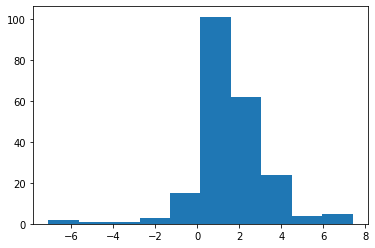

In [59]:
plt.hist(new_df['Female_Minus_Male'])

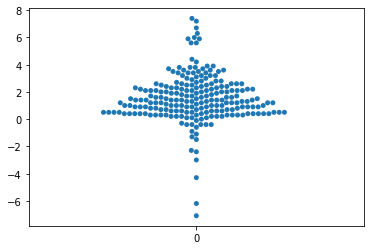

In [60]:
sns.swarmplot(data=new_df['Female_Minus_Male'])

{'whiskers': [<matplotlib.lines.Line2D at 0xd4b8438>,
 'caps': [<matplotlib.lines.Line2D at 0xd520e10>,
 'boxes': [<matplotlib.lines.Line2D at 0xd4b8be0>],
 'medians': [<matplotlib.lines.Line2D at 0xd520b70>],
 'fliers': [<matplotlib.lines.Line2D at 0xd530b38>],
 'means': []}

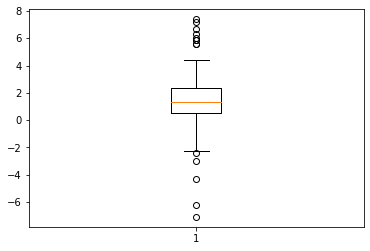

In [61]:
plt.boxplot(x=new_df['Female_Minus_Male'])

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

In [62]:
print(new_df['Female_Minus_Male'].describe())

count    218.000000
mean       1.509633
std        1.799859
min       -7.100000
25%        0.500000
50%        1.350000
75%        2.375000
max        7.400000
Name: Female_Minus_Male, dtype: float64


#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [63]:
print("Longest lifespan for females compared to males:\n{}".format(new_df[new_df['Female_Minus_Male'] > 0]['Country/Territory']))

Longest lifespan for females compared to males:
0                 Afghanistan
1                     Albania
2                     Algeria
3              American Samoa
5                      Angola
6                    Anguilla
7         Antigua and Barbuda
8                   Argentina
9                     Armenia
10                    Armenia
11                  Australia
12                    Austria
13                 Azerbaijan
14                 Azerbaijan
16                 Bangladesh
17                   Barbados
18                    Belarus
19                    Belgium
20                     Belize
21                      Benin
22                    Bermuda
24                    Bolivia
25     Bosnia and Herzegovina
26                   Botswana
27                     Brazil
28     British Virgin Islands
29                     Brunei
30                   Bulgaria
31               Burkina Faso
32                    Burundi
                ...          
186                  S

In [64]:
print("Longest lifespan for males compared to females:\n{}".format(new_df[new_df['Female_Minus_Male'] < 0]['Country/Territory']))

Longest lifespan for males compared to females:
4                               Andorra
15                              Bahrain
23                               Bhutan
74                            Greenland
98                               Jordan
106                              Kuwait
113                               Libya
117                               Macau
137                               Nauru
147                                Oman
151                    Papua New Guinea
158                               Qatar
163               Saint Kitts and Nevis
167    Saint Vincent and the Grenadines
170                        Saudi Arabia
180                             Somalia
201            Turks and Caicos Islands
205                United Arab Emirates
Name: Country/Territory, dtype: object


In [65]:
print("Outliers(those with same age for females and males):\n{}".format(new_df[new_df['Female_Minus_Male'] == 0]['Country/Territory']))

Outliers(those with same age for females and males):
111    Lesotho
Name: Country/Territory, dtype: object


#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

In [66]:
print(new_df.groupby(['Continent']).describe())

              Average(Years)                                            \
                       count       mean       std   min     25%    50%   
Continent                                                                
Africa                  50.0  20.728000  4.739717  15.4  17.825  19.70   
Asia                    48.0  30.310417  6.390926  18.8  26.275  30.05   
Europe                  54.0  40.575926  4.378288  29.1  38.375  41.60   
North America           33.0  33.327273  6.492316  22.1  28.300  33.50   
Oceania                 21.0  28.538095  5.376567  22.0  24.400  26.40   
South America           12.0  29.633333  3.191276  24.3  27.925  29.05   

                            Male(Years)             ... Female (Years)        \
                  75%   max       count       mean  ...            75%   max   
Continent                                           ...                        
Africa         21.100  35.4        50.0  20.324000  ...         21.550  36.3   
Asia         

#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

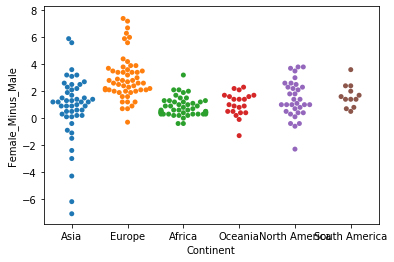

In [67]:
sns.swarmplot(x='Continent',y='Female_Minus_Male',data=new_df)

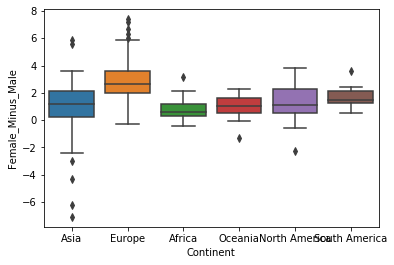

In [68]:
sns.boxplot(x='Continent',y='Female_Minus_Male',data=new_df)

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

The continent with the largest spread happens to also be the largest continent with the largest population. Leading to more possible outliers and such.

### 2. Answer Questions 1 through 10 from [here](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) below (please copy and paste each question into its own cell with answers below it).

In [69]:
#AdultDataSet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

#### 1. How many men and women (sex feature) are represented in this dataset?

In [70]:
print(df.sex.value_counts())
print("For a total of: {}".format(len(df['sex'])))

 Male      21789
 Female    10771
Name: sex, dtype: int64
For a total of: 32560


#### 2. What is the average age (age feature) of women?

In [71]:
print("Average age of women is {}".format(df[df['sex'] == 'Female']['age'].mean()))

Average age of women is nan


#### 3. What is the percentage of German citizens (native-country feature)?

In [72]:
print((df['native-country'] == 'Germany').value_counts(normalize=True))

False    0.995792
True     0.004208
Name: native-country, dtype: float64


#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [73]:
print("Mean for those earning more than 50k per year {}".format(df[df['salary']=='>50K']['age'].mean()))
print("Standard deviation for those earning more than 50k per year {}".format(np.std(df[df['salary']=='>50K']['age'])))
print("Mean for those earning less than 50k per year {}".format(df[df['salary']=='<=50K']['age'].mean()))
print("Standard deviation for those earning less than 50k per year {}".format(np.std(df[df['salary']=='<=50K']['age'])))

Mean for those earning more than 50k per year 44.24984058155847
Standard deviation for those earning more than 50k per year 10.518356927661575
Mean for those earning less than 50k per year 36.78364820583357
Standard deviation for those earning less than 50k per year 14.020081404055292


#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [74]:
print(df[df.salary=='>50K']['education'].value_counts())
print("Not true, not all have at least a high school education")

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64
Not true, not all have at least a high school education


#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [75]:
print(df.groupby(['race','sex'])['age'].describe())

                               count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19173.0  39.652532  13.436378  17.0  29.0  38.0   

                               75%   ma

#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [76]:
print(df.loc[(df['sex'] == 'Male') & (df['martial-status'].str.startswith('Married')), 'salary'].value_counts())

Series([], Name: salary, dtype: int64)


#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [77]:
max_hours = df['hours-per-week'].max()
print("Maximum number of hours a person works per week is: {}".format(max_hours))
total_max = df[(df['hours-per-week']==max_hours)]['hours-per-week'].count()
print("This many people work the max amount of hours: {}".format(total_max))
print('Percentage of those working the max amount of hours and making >50k: {}%'.format(df[(df['hours-per-week']==max_hours) & (df['salary']=='>50K')]['hours-per-week'].count() / total_max * 100))

Maximum number of hours a person works per week is: 99
This many people work the max amount of hours: 85
Percentage of those working the max amount of hours and making >50k: 29.411764705882355%


#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [79]:
print(pd.crosstab(df['native-country'], df['salary']))

salary                      <=50K  >50K
native-country                         
?                             437   146
Cambodia                       12     7
Canada                         82    39
China                          55    20
Columbia                       57     2
Cuba                           70    25
Dominican-Republic             68     2
Ecuador                        24     4
El-Salvador                    97     9
England                        60    30
France                         17    12
Germany                        93    44
Greece                         21     8
Guatemala                      61     3
Haiti                          40     4
Holand-Netherlands              1     0
Honduras                       12     1
Hong                           14     6
Hungary                        10     3
India                          60    40
Iran                           25    18
Ireland                        19     5
Italy                          48    25
